

## Convolutional Neural Networks

---

In this notebook, we visualize four activation maps in a CNN layer.


### 1. Import the Image

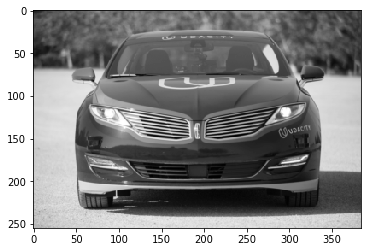

In [1]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.simplefilter('ignore')

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = '../data/images/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

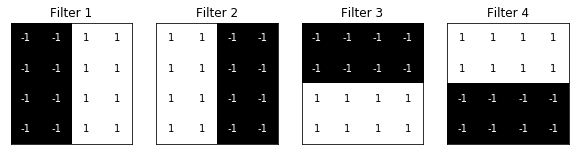

In [2]:
import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Check dimentionality of convolution layer

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, strides=2, padding='valid', 
    activation='relu', input_shape=(200, 200, 1)))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


## Check Dimentionality of MaxPool Layer 

In [4]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## CNN for Image Classifications 

The network begins with a sequence of three convolutional layers, followed by max pooling layers. These first six layers are designed to take the input array of image pixels and convert it to an array where all of the spatial information has been squeezed out, and only information encoding the content of the image remains. The array is then flattened to a vector in the seventh layer of the CNN. It is followed by two dense layers designed to further elucidate the content of the image. The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

## Add Input layer #1
model.add(Conv2D(filters=16,kernel_size=2, padding='same',activation='relu',input_shape = (32,32,3)))
# Add MaxPool Layer #2
model.add(MaxPooling2D(strides=2,pool_size=2))


# Another Convolution layer #3
model.add(Conv2D(filters=32,kernel_size=2, padding='same',activation='relu'))
# Add MaxPool Layer #4
model.add(MaxPooling2D(strides=2,pool_size=2))

# Another Convolution layer #5
model.add(Conv2D(filters=64,kernel_size=2, padding='same',activation='relu'))
# Add MaxPool Layer #6
model.add(MaxPooling2D(strides=2,pool_size=2))

# Flatten the encoded data for dense layer #6
model.add(Flatten())

# Dense layer #7
model.add(Dense(500,activation='relu'))

# Output Layer #8
model.add(Dense(10,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [6]:
import datetime
print("Last run on "+datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))

Last run on 08-Jun-2018 10:48
